In [136]:
#!pip install geopandas

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
pd.set_option('display.max_columns', None)


In [138]:
pharma = pd.read_csv("Pharmacies.csv")

C:\Users\jeise\AppData\Local\Temp\ipykernel_21844\3833991800.py:1: DtypeWarning: Columns (33,34,42) have mixed types. Specify dtype option on import or set low_memory=False.
  pharma = pd.read_csv("Pharmacies.csv")


In [139]:
pharma.head()

,FID,ID,SECCLASS,NAME,TELEPHONE,ADDRESS,ADDRESS2,CITY,STATE,ZIP,ZIPP4,COUNTY,FIPS,DIRECTIONS,EMERGTITLE,EMERGTEL,EMERGEXT,CONTDATE,CONTHOW,GEODATE,GEOHOW,HSIPTHEMES,NAICSCODE,NAICSDESCR,GEOLINKID,X,Y,ST_VENDOR,ST_VERSION,GEOPREC,PHONELOC,QC_QA,WEBSITE,NPI,ENT_TYPE,ORGAN_NAME,PROVID_11,PROVID_12,PROVID_20,PROVID_21,PROVID_22,PROVID_23,PROVID_24,PROVID_25,PROVID_26,PROVID_27,PROVID_36,LASTUP_37,HEALTH_47,PROVID_48,PROVID_49,HEALTH_51,PROVID_52,PROVID_53,HEALTH_55,PROVID_56,PROVID_57,HEALTH_59,PROVID_60,PROVID_61,HEALTH_63,PROVID_64,PROVID_65,HEALTH_67,PROVID_68,PROVID_69,HEALTH_71,PROVID_72,PROVID_73,HEALTH_75,PROVID_76,PROVID_77,HEALTH_79,PROVID_80,PROVID_81,HEALTH_83,PROVID_84,PROVID_85,HEALTH_87,PROVID_88,PROVID_89,HEALTH_91,PROVID_92,PROVID_93,HEALTH_95,PROVID_96,PROVID_97,HEALTH_99,PROVID_100,PROVID_101,HEALTH_103,PROVID_104,PROVID_105
0,1001,11699187,UNCLASSIFIED,MOWRY MEDICAL PHARMACY,510-793-5011,1999 MOWRY AVENUE,SUITE 2A,FREMONT,CA,94538,1706,ALAMEDA,6001,,,,,2010-07-01T00:00:00.000Z,ALT REF,2010-07-01T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,762826384,-121.981096,37.558298,NAVTEQ,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,HTTP://WWW.HALLERSRX.NET,1740326784,2,MOWRY MEDICAL PHARMACY,GURPARTAP SINGH BASRAI,3,1999 MOWRY AVE,SUITE 2A,FREMONT,CA,945381738,US,5107935011,5107929599,01/29/2007,08/05/2008,183500000X,31057,CA,3336C0003X,PHY21138,CA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1002,11699219,UNCLASSIFIED,MOWRY PLAZA PHARMACY,510-745-9900,668 MOWRY AVENUE,,FREMONT,CA,94536,4113,ALAMEDA,6001,,,,,2010-07-01T00:00:00.000Z,ALT REF,2010-07-01T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,24635683,-121.973766,37.566182,NAVTEQ,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,HTTP://WWW.HALLERSRX.NET,1043356090,2,MOWRY PLAZA PHARMACY,GURPARTAP SINGH BASRAI,5,668 MOWRY AVE,,FREMONT,CA,945364113,US,5107459900,5107459950,01/29/2007,08/05/2008,183500000X,31057,CA,3336C0003X,PHY45452,CA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1003,11698012,UNCLASSIFIED,KAISER PERMANENTE DALY CITY MEDICAL OFFICE,650-301-5788,395 HICKEY BOULEVARD,FIRST FLOOR,DALY CITY,CA,94015,2770,SAN MATEO,6081,,,,,2010-07-01T00:00:00.000Z,ALT REF,2010-07-02T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,23749159,-122.463054,37.662743,NAVTEQ,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,HTTPS://WWW.KAISERPERMANENTE.ORG,1790833531,2,KAISER FOUNDATION HEALTH PLAN INC,KAISER PERMANENTE PHARMACY,3,395 HICKEY BLVD FL 1,,DALY CITY,CA,940152770,US,,,01/08/2007,10/09/2009,333600000X,,,3336C0003X,PHY46565,CA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1004,11697767,UNCLASSIFIED,KAISER PERMANENTE TRACY MEDICAL OFFICE,209-839-6212,2185 WEST GRANT LINE ROAD,,TRACY,CA,95377,7309,SAN JOAQUIN,6077,,,,,2010-06-28T00:00:00.000Z,ALT REF,2010-06-28T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,112009981,-121.456823,37.755796,NAVTEQ,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,HTTPS://WWW.KAISERPERMANENTE.ORG,1609923937,2,KAISER FOUNDATION HEALTH PLAN INC,KAISER PERMANENTE PHARMACY,3,2185 W GRANT LINE RD,,TRACY,CA,953777309,US,,,01/05/2007,07/08/2007,3336C0003X,,,3336M0003X,PHY46987,CA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,1005,11666870,UNCLASSIFIED,WALGREENS - 13596,650-326-3404,300 UNIVERSITY AVENUE,,PALO ALTO,CA,94301,1715,SANTA CLARA,6085,,,,,2010-07-02T00:00:00.000Z,ALT REF,2010-07-02T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,23716026,-122.161178,37.445947,NAVTEQ,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,HTTP://WWW.WALGREENS.COM,1871508143,2,WALGREEN CO,WALGREEN DRUG STORE,3,1901 E VOORHEES ST,MS720,DANVILLE,IL,618344509,US,2175548964,2175548546,07/29/2006,07/17/2007,332B00000X,,,3336C0003X,,,333600000X,PHY40643,CA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [140]:
pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62973 entries, 0 to 62972
Data columns (total 93 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         62973 non-null  int64  
 1   ID          62973 non-null  int64  
 2   SECCLASS    62973 non-null  object 
 3   NAME        62973 non-null  object 
 4   TELEPHONE   62973 non-null  object 
 5   ADDRESS     62973 non-null  object 
 6   ADDRESS2    62973 non-null  object 
 7   CITY        62973 non-null  object 
 8   STATE       62973 non-null  object 
 9   ZIP         62973 non-null  int64  
 10  ZIPP4       62973 non-null  object 
 11  COUNTY      62973 non-null  object 
 12  FIPS        62973 non-null  int64  
 13  DIRECTIONS  62973 non-null  object 
 14  EMERGTITLE  62973 non-null  object 
 15  EMERGTEL    62973 non-null  object 
 16  EMERGEXT    62973 non-null  object 
 17  CONTDATE    61408 non-null  object 
 18  CONTHOW     62973 non-null  object 
 19  GEODATE     62973 non-nul

In [141]:
maine_data = pharma.query("STATE == 'ME'").copy()
maine_data['geo_location'] = maine_data.apply(lambda row: (row['X'], row['Y']), axis=1)
maine_data.head()

,FID,ID,SECCLASS,NAME,TELEPHONE,ADDRESS,ADDRESS2,CITY,STATE,ZIP,ZIPP4,COUNTY,FIPS,DIRECTIONS,EMERGTITLE,EMERGTEL,EMERGEXT,CONTDATE,CONTHOW,GEODATE,GEOHOW,HSIPTHEMES,NAICSCODE,NAICSDESCR,GEOLINKID,X,Y,ST_VENDOR,ST_VERSION,GEOPREC,PHONELOC,QC_QA,WEBSITE,NPI,ENT_TYPE,ORGAN_NAME,PROVID_11,PROVID_12,PROVID_20,PROVID_21,PROVID_22,PROVID_23,PROVID_24,PROVID_25,PROVID_26,PROVID_27,PROVID_36,LASTUP_37,HEALTH_47,PROVID_48,PROVID_49,HEALTH_51,PROVID_52,PROVID_53,HEALTH_55,PROVID_56,PROVID_57,HEALTH_59,PROVID_60,PROVID_61,HEALTH_63,PROVID_64,PROVID_65,HEALTH_67,PROVID_68,PROVID_69,HEALTH_71,PROVID_72,PROVID_73,HEALTH_75,PROVID_76,PROVID_77,HEALTH_79,PROVID_80,PROVID_81,HEALTH_83,PROVID_84,PROVID_85,HEALTH_87,PROVID_88,PROVID_89,HEALTH_91,PROVID_92,PROVID_93,HEALTH_95,PROVID_96,PROVID_97,HEALTH_99,PROVID_100,PROVID_101,HEALTH_103,PROVID_104,PROVID_105,geo_location
24007,23008,11675918,UNCLASSIFIED,HANNAFORD,207-794-6513,22 GODING AVENUE,LINCOLN PLAZA,LINCOLN,ME,4457,1323,PENOBSCOT,23019,,,,,2010-07-23T00:00:00.000Z,ALT REF,2010-07-23T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,,-68.516486,45.360891,TGS,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,HTTP://WWW.HANNAFORD.COM,1184732562,2,HANNAFORD BROS. CO.,HANNAFORD FOOD AND DRUG #140,3,PO BOX 1000,MS3000,PORTLAND,ME,41045005,US,,,08/27/2006,12/03/2009,332B00000X,,,3336C0003X,PH50000984,ME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"(-68.516486, 45.360891)"
24078,23079,11692455,UNCLASSIFIED,PARADIS SHOP N SAVE,207-834-4204,62 WEST MAIN STREET,SUITE 101,FORT KENT,ME,4743,1244,AROOSTOOK,23003,,,,,2010-08-09T00:00:00.000Z,PHONE,2010-08-09T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,98393327,-68.594096,47.249607,NAVTEQ,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,HTTP://WWW.HANNAFORD.COM,1386728434,2,LOUIS J. PARADIS INC.,PARADIS SHOP-N-SAVE SUPERMARKET/PHARMACY,3,62 W MAIN ST,SUITE 101,FORT KENT,ME,47431244,US,2078344204,2078342870,10/25/2006,07/08/2007,332B00000X,PH50001215,ME,3336C0003X,PH50001215,ME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"(-68.594096, 47.249607)"
24080,23081,11662552,UNCLASSIFIED,WAL-MART - 1974,207-532-2213,17 LUDLOW ROAD,,HOULTON,ME,4730,3524,AROOSTOOK,23003,,,,,2010-08-09T00:00:00.000Z,PHONE,2010-08-09T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,123112844,-67.842426,46.143192,NAVTEQ,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,HTTP://WWW.WALMART.COM,1376560649,2,WAL-MART STORES EAST LP,WAL-MART PHARMACY,3,702 SW 8TH ST,,BENTONVILLE,AR,727166209,US,,,07/16/2006,01/26/2009,332B00000X,,,333600000X,,,3336C0003X,PH50001148,ME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"(-67.842426, 46.143192)"
24081,23082,11663751,UNCLASSIFIED,WAL-MART - 2178,207-454-8326,379 SOUTH STREET,,CALAIS,ME,4619,1129,WASHINGTON,23029,,,,,2010-08-09T00:00:00.000Z,PHONE,2010-08-09T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,123138869,-67.278918,45.174961,NAVTEQ,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,HTTP://WWW.WALMART.COM,1669490173,2,WAL-MART STORES EAST LP,WAL-MART PHARMACY,3,702 SW 8TH ST,,BENTONVILLE,AR,727166209,US,,,07/17/2006,01/26/2009,332B00000X,,,333600000X,,,3336C0003X,PH50001147,ME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"(-67.278918, 45.174961)"
24082,23083,11641192,UNCLASSIFIED,PATTEN DRUG COMPANY,207-528-2244,20 MAIN STREET,,PATTEN,ME,4765,3151,PENOBSCOT,23019,,,,,2010-08-11T00:00:00.000Z,PHONE,2010-08-11T00:00:00.000Z,MANUAL,"CRITICAL INFRASTRUCTURE, PDD-63; PUBLIC HEALTH...",446110,PHARMACIES,123107590,-68.447559,45.996683,NAVTEQ,2009Q4,ONENTITY,YES,TECHNIGRAPHICS,,1447317821,2,PATTEN DRUG LLC,PATTEN DRUG COMPANY,3,PO BOX 675,,PATTEN,ME,47650675,US,,,01/03/2007,01/19/2010,333600000X,,,3336C0003X,PH50000115,ME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"(-68.447559, 45.996683)"


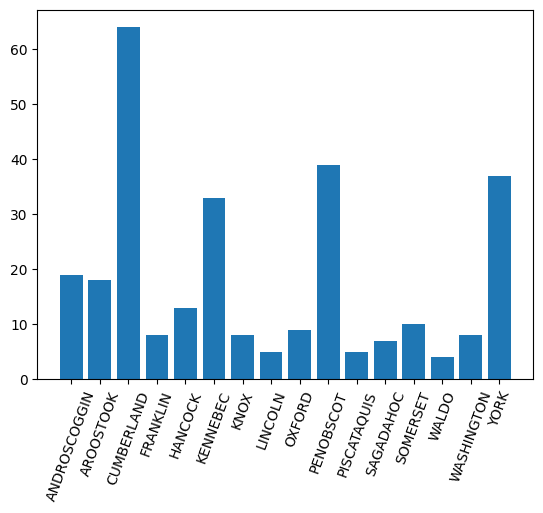

In [142]:
maine_grouped =maine_data.groupby("COUNTY").ID.count().reset_index()
plt.bar(x= "COUNTY", height="ID", data= maine_grouped)
plt.xticks(rotation=70)
plt.show()
# maine_grouped

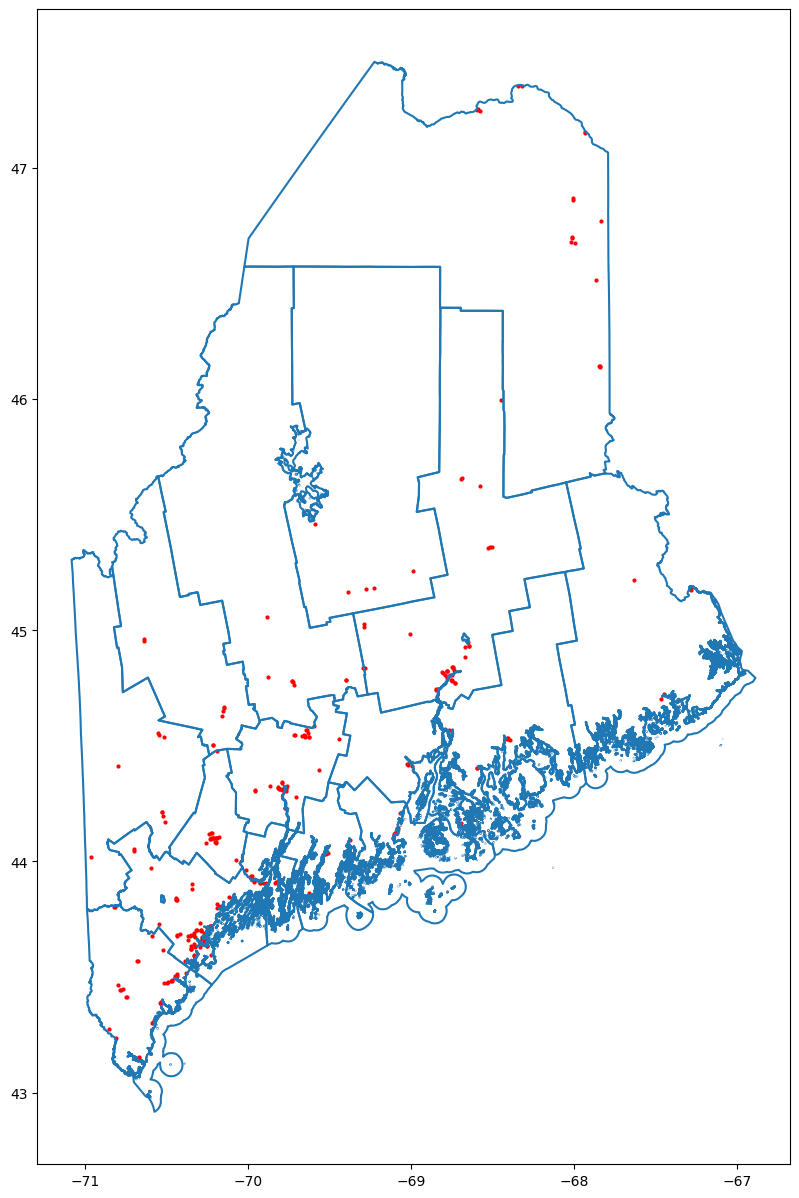

,OBJECTID,COUNTY,CNTYCODE,LAND,ISLAND,TAG,GlobalID,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,None,None,y,y,n,e5bfd8a7-a131-45a3-b470-7c453c8d14ff,None,None,None,None,8.003660e+03,3.685274e+02,"POLYGON ((-68.12773 43.97323, -68.12800 43.973..."
1,2,None,None,y,y,n,75db6381-559d-486e-a492-23a2b9ab8a64,None,None,None,None,1.712458e+04,6.144653e+02,"POLYGON ((-67.09989 44.50026, -67.10004 44.500..."
2,3,None,None,y,y,n,185e1e16-e84c-4576-845e-a722b74cca1e,None,None,None,None,3.602056e+03,2.558386e+02,"POLYGON ((-67.09606 44.50386, -67.09612 44.503..."
3,4,None,None,y,y,n,588d17c2-7cb2-4245-b44e-7151d7236b91,None,None,None,None,1.915658e+03,1.717037e+02,"POLYGON ((-67.08525 44.53134, -67.08513 44.531..."
4,5,Cumberland,05,n,n,n,aa5eabc8-3f43-408e-a5ed-4acf2a6e4fb7,None,None,None,None,7.702424e+08,1.088664e+06,"POLYGON ((-69.86782 43.91827, -69.86746 43.918..."


In [143]:
maine_counties = gpd.GeoDataFrame.from_file("./geo_data/Maine_County_Boundary_Polygons_Feature.shp")
plot, ax = plt.subplots(figsize=(15,15))
maine_counties.boundary.plot(ax=ax)
plt.scatter(x=maine_data.X, y=maine_data.Y, color="red", s=4)
plt.show()
maine_counties.head()
